In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/dataset_merged_sorted.zip

Archive:  gdrive/MyDrive/dataset_merged_sorted.zip
  inflating: dataset_merged_sorted.csv  


In [ ]:
df=pd.read_csv('dataset_merged_sorted.csv')
# df2=pd.read_csv('/content/gdrive/MyDrive/dataset_sample.csv')

In [ ]:
df.shape

(11263001, 15)

In [ ]:
gateway_id=df.gateway.unique()
len(gateway_id)

9

In [ ]:
# gateway_id2=df2.gateway.unique()
# len(gateway_id2)

3

In [ ]:
df.groupby(by='gateway').size()

gateway
0000024b0b031c97    2490639
00000f0c210281c4    1326687
00000f0c210721f2    5757575
00000f0c22433141     144777
00000f0c224331c4      17029
00800000a0001793     186592
00800000a0001794      61080
00800000a0001914      76706
7276ff002e062804    1201916
dtype: int64

In [ ]:
# new_sample=pd.read_csv('/content/gdrive/MyDrive/dataset_sample.csv')
df=df.drop(columns=['time',	'device_address',	'physical_payload',	
                                'crc_status',	'frequency',	'bandwidth',	'code_rate'	,	'snr',	'size'	,'mtype',	'fcnt','fport'],axis=1)
df=df.dropna()
df.head()

,gateway,spreading_factor,rssi
0,00000f0c210281c4,8.0,-110
1,00000f0c210281c4,8.0,-109
2,00000f0c210281c4,8.0,-114
3,00000f0c22433141,7.0,-115
4,00000f0c22433141,7.0,-112


In [ ]:
# new_sample=pd.read_csv('/content/gdrive/MyDrive/dataset_sample.csv')
# df2=df2.drop(columns=['time',	'device_address',	'physical_payload',	
#                                 'crc_status',	'frequency',	'bandwidth',	'code_rate'	,	'snr',	'size'	,'mtype',	'fcnt','fport'],axis=1)
# df2=df2.dropna()
# df2.head()

,gateway,spreading_factor,rssi
0,7276ff002e062804,8.0,-89
1,7276ff002e062804,7.0,-115
2,0000024b0b031c97,12.0,-93
3,0000024b0b031c97,8.0,-101
4,0000024b0b031c97,7.0,-108


In [ ]:
lg=gateway_id[1:4]
lg

array(['00000f0c22433141', '00000f0c210721f2', '00000f0c224331c4'],
      dtype=object)

In [ ]:
00000f0c22433141
00800000a0001793


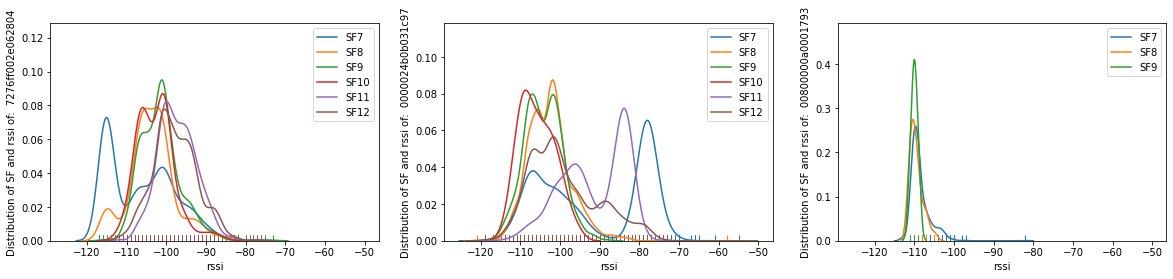

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,4))
c=0
for gname in gateway_id2:
  plt.ylabel(gname)
  for i in range (7,13):
    try:
      z=(df2.groupby(by=['gateway']).get_group(gname)).groupby(by=['spreading_factor']).get_group(i)['rssi']
      l='SF'+str(i)
      sns.distplot(z, hist=False, rug=True,ax=axes[c],label=l)
      del z
    except:
      continue
  # axes[c].set_xlabel('rssi')
  axes[c].set_ylabel('Distribution of SF and rssi of:  '+gname)
  leg = axes[c].legend()
  
  c=c+1


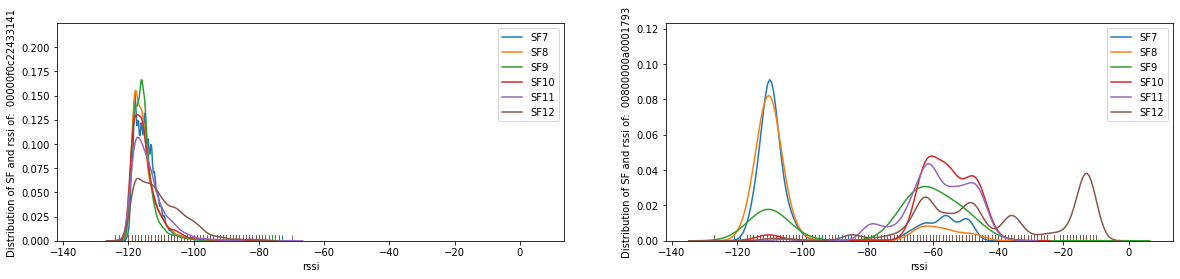

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,4))
c=0
List_g=['00000f0c22433141','00800000a0001793']
for gname in List_g:
  plt.ylabel(gname)
  for i in range (7,13):
    try:
      z=(df.groupby(by=['gateway']).get_group(gname)).groupby(by=['spreading_factor']).get_group(i)['rssi']
      l='SF'+str(i)
      sns.distplot(z, hist=False, rug=True,ax=axes[c],label=l)
      del z
    except:
      continue
  axes[c].set_ylabel('Distribution of SF and rssi of:  '+gname)
  leg = axes[c].legend()
  
  c=c+1


AttributeError: ignored

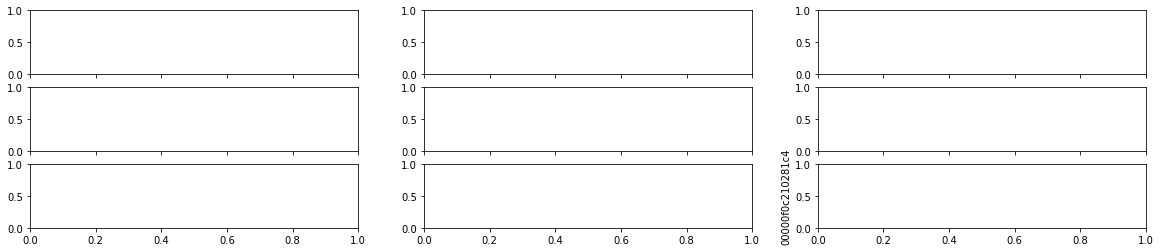

In [ ]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(20,4))
c=0
for gname in gateway_id:
  plt.ylabel(gname)
  for i in range (7,13):
    try:
      z=(df.groupby(by=['gateway']).get_group(gname)).groupby(by=['spreading_factor']).get_group(i)['rssi']
      l='SF'+str(i)
      sns.distplot(z, hist=False, rug=True,ax=axes[c],label=l)
      del z
    except:
      continue
  axes[c].set_ylabel('Distribution of SF and rssi of:  '+gname)
  leg = axes[c].legend()
  
  c=c+1